In [36]:
## writing dsq files: corrupt
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [19]:
## writing dsq files: corrupt rescue
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [1]:
## writing dsq files: tissue_number
tissue_number <- c(3:40)
writefunc <-"  "
for(i in seq(length(tissue_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R ', tissue_number[i],' 500 8 0.5 1 1 100 ',100+i," tissue_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [20]:
## writing dsq files: tissue_number rescue
tissue_number <- c(3:40)
writefunc <-"  "
for(i in seq(length(tissue_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R ', tissue_number[i],' 500 8 0.6 1 1 100 ',100+i," tissue_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [38]:
## writing dsq files: gene_number
gene_number <- c(5:200)*10
writefunc <-"  "
for(i in seq(length(gene_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 ',gene_number[i],' 8 0.6 1 1 100 ',100+i," gene_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [21]:
## writing dsq files: gene_number rescue
gene_number <- c(5:200)*10
writefunc <-"  "
for(i in seq(length(gene_number))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/rescue.R 5 ',gene_number[i],' 8 0.6 1 1 100 ',100+i," gene_number"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number_rescue_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [6]:
## writing dsq files: pi
empirical_pi <- c(1:100)/100
update.pi <- c(TRUE, FALSE)
writefunc <-"  "
for(i in seq(length(empirical_pi))){
    for(j in c(1:2)){
        writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v3.R 5 500 8 0.6 1 1 100 ',100+i," pi 0.6 ",update.pi[j]," ",empirical_pi[i]))
    }
 
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/pi_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [18]:
## writing dsq files: tau_v
tau_v = c(0.01,0.1,1,4,20,100)
writefunc <-"  "
for(i in seq(length(tau_v))){

        writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v3.R 5 500 8 0.6 1 1 100 ',100+i," tau_v ",tau_v[i]," TRUE 0.3"))

 
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tau_v_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [ ]:
## writing dsq files
corrupt_pi <- c(1:100)/100
writefunc <-"  "
for(i in seq(length(corrupt_pi))){
 writefunc <- rbind(writefunc, paste0('module load R/3.6.1; cd /gpfs/ysm/pi/zhao-data/wd262/sc_immune/sc_immune; Rscript --vanilla ./Simulation_Results/get_simu_rst.v2.R 5 500 8 ',corrupt_pi[i],' 1 1 100 ',100+i," corrupt"))
}

write.table(writefunc, file ='/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt_dsq_jobs.sh', row.names = FALSE, col.names = FALSE, quote=FALSE)

In [7]:
set.seed(2021)
library(nnls)
library(ggplot2)
library(plotROC)
library(Seurat)
library(cowplot)
library(gridExtra)
options(repr.plot.width=14, repr.plot.height=10)

Warning message in system2(command = python, args = shQuote(config_script), stdout = TRUE, :
“running command ''/gpfs/ysm/home/wd262/venv/bin/python' '/gpfs/ysm/project/zhao/wd262/conda_envs/r_env/lib/R/library/reticulate/config/config.py' 2>/dev/null' had status 134”


In [55]:
get_summary.info <- function(files_rst,files_rst_frac,files_same_input){
    summary.info <- list()

    summary.info$cor.same <- c()
    summary.info$cor.music <- c()
    summary.info$cor.nnls <- c()

    summary.info$z_true <- list()
    summary.info$z_same <- list()
    summary.info$z_music <- list()
    summary.info$z_nnls <- list()

    summary.info$W_tilde <- list()
    summary.info$est_gamma <- list()
    summary.info$true_gamma <- list()

    summary.info$true_vg <- list()
    summary.info$est_vg <- list()

    summary.info$true_w <- list() 
    summary.info$est_w <- list() 

    mcmc_samples_theta1 =100

    for(i in seq(length(files_rst))){
    #for(i in 1:2){
        rst <- readRDS(files_rst[i])
        rst_frac <- readRDS(files_rst_frac[i])
        same_input <- readRDS(files_same_input[i])

        true_z = t(same_input$true_Z)
        true_w =  same_input$true_w$w ## true w for T tissues
        true_v = same_input$true_w$v 
        true_gamma = same_input$true_w$gamma
        W_tilde = same_input$W_tilde 


        summary.info$z_tranSig[[i]] <- rst_frac$z_est_tranSig
        summary.info$z_music[[i]] <- rst_frac$z_est_music
        summary.info$z_empirical[[i]] <- rst_frac$z_est_empirical
        summary.info$z_true[[i]] <- true_z

        summary.info$cor.same <- append(summary.info$cor.same, cor(as.vector(rst_frac$z_est_tranSig),as.vector(true_z)))
        summary.info$cor.music <- append(summary.info$cor.music, cor(as.vector(rst_frac$z_est_music),as.vector(true_z)))
        summary.info$cor.empirical <- append(summary.info$cor.empirical, cor(as.vector(rst_frac$z_est_empirical),as.vector(true_z)))


        summary.info$W_tilde[[i]] <- W_tilde
        summary.info$est_gamma[[i]] <- rst$averg_gamma
        summary.info$true_gamma[[i]] <- true_gamma

        summary.info$true_vg[[i]] <- true_v * true_gamma 
        summary.info$est_vg[[i]] <-  rst$vg

        summary.info$true_w[[i]] <- true_w 
        summary.info$est_w[[i]] <-  rst$theta1$w[[1]]

    }
    return(summary.info)
}

In [15]:
files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/corrupt',pattern = "rst.T=5*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/corrupt',pattern = "rst_frac.*", full.names = TRUE)
files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/corrupt/',c(1:100),'/raw_same_input.rds')

In [32]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.corrupt.rds")

In [4]:
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.corrupt.rds")

In [30]:
summary.info$cor.empirical

[1] -0.6058959

In [33]:
corrupt_pi <- c(1:100)/100
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 corrupt_pi = rep(c(1:100)/100,3),
                 method = c(rep("SAME",100),rep("MuSiC",100),rep("empirical",100)))

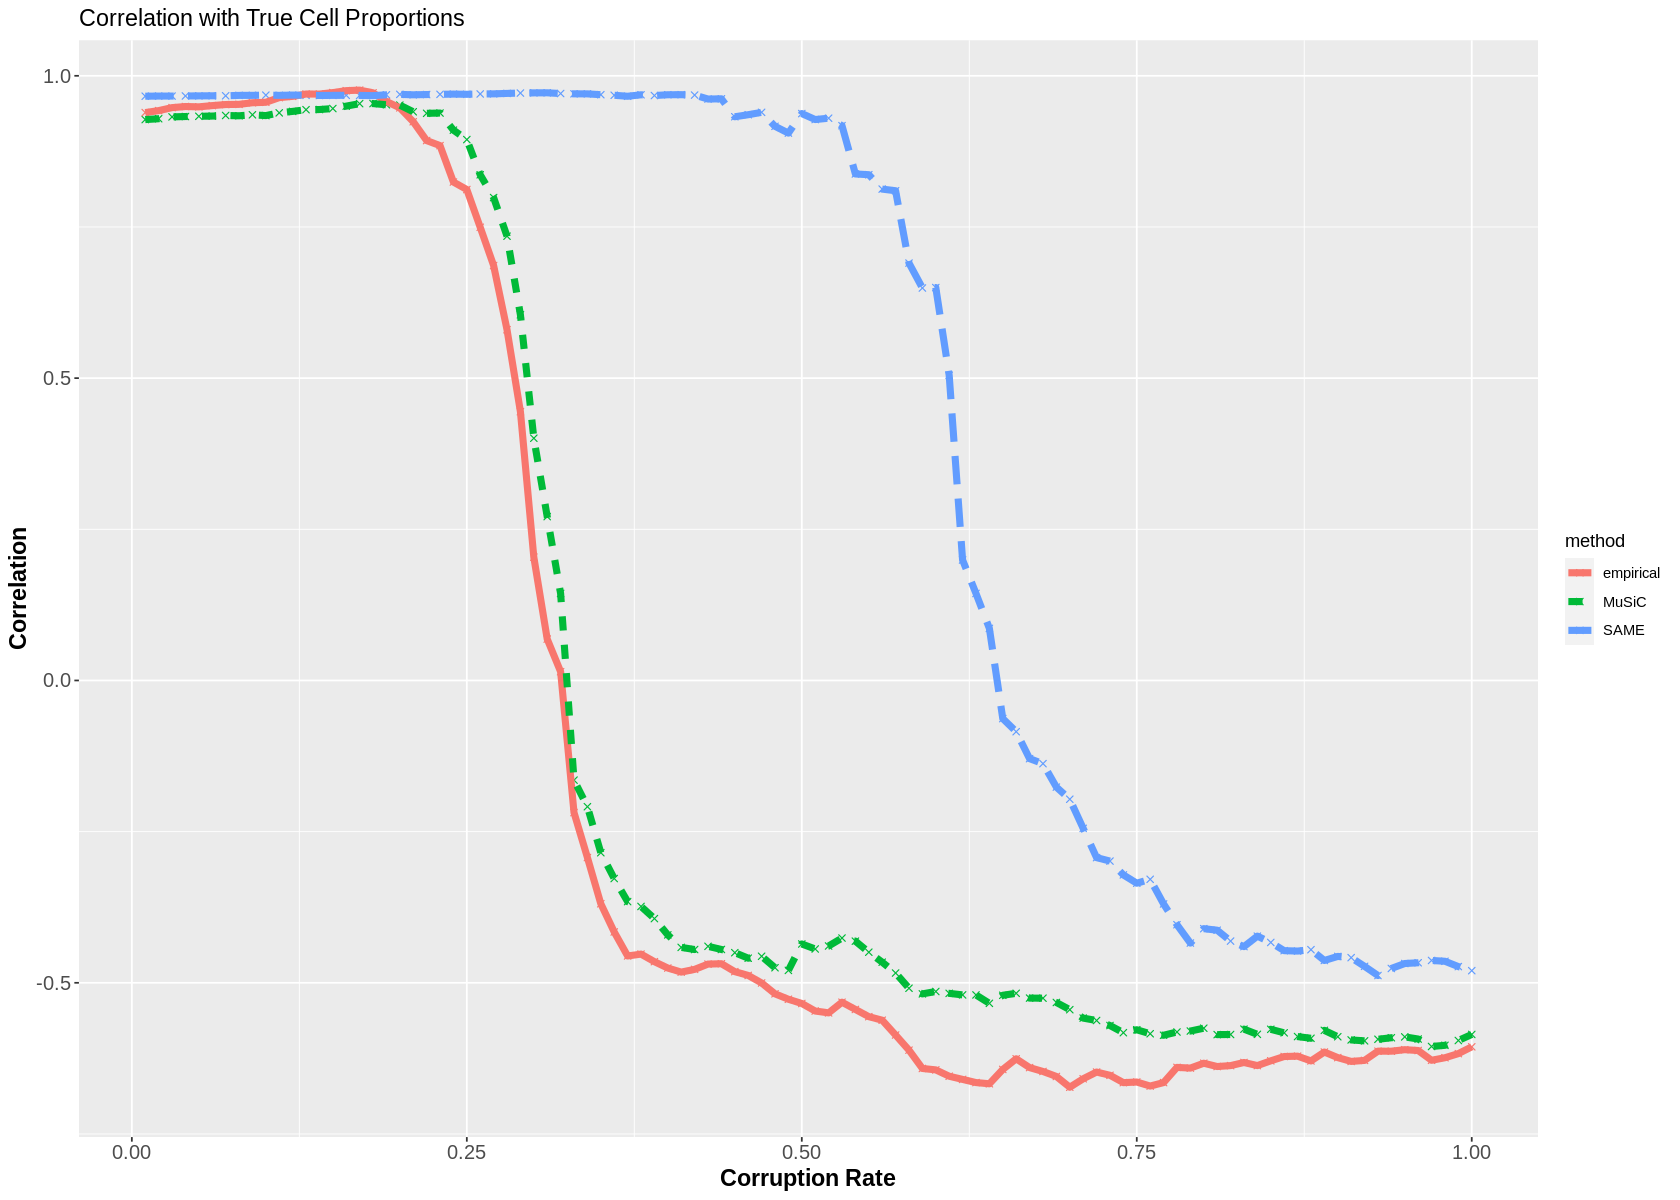

In [36]:
ggplot(dat, aes(corrupt_pi,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Corruption Rate", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [11]:
tbl <- lapply(c(1:7),function(idx) 
    data.frame('Estmated_Gamma' = as.vector(summary.info$est_gamma[[10*(idx-1)+1]]),
               "True_Gamma" = as.vector(summary.info$true_gamma[[10*(idx-1)+1]]),
               "corrupt" = rep((idx-1)*0.1,4000)))
tbl <- Reduce(rbind, tbl)

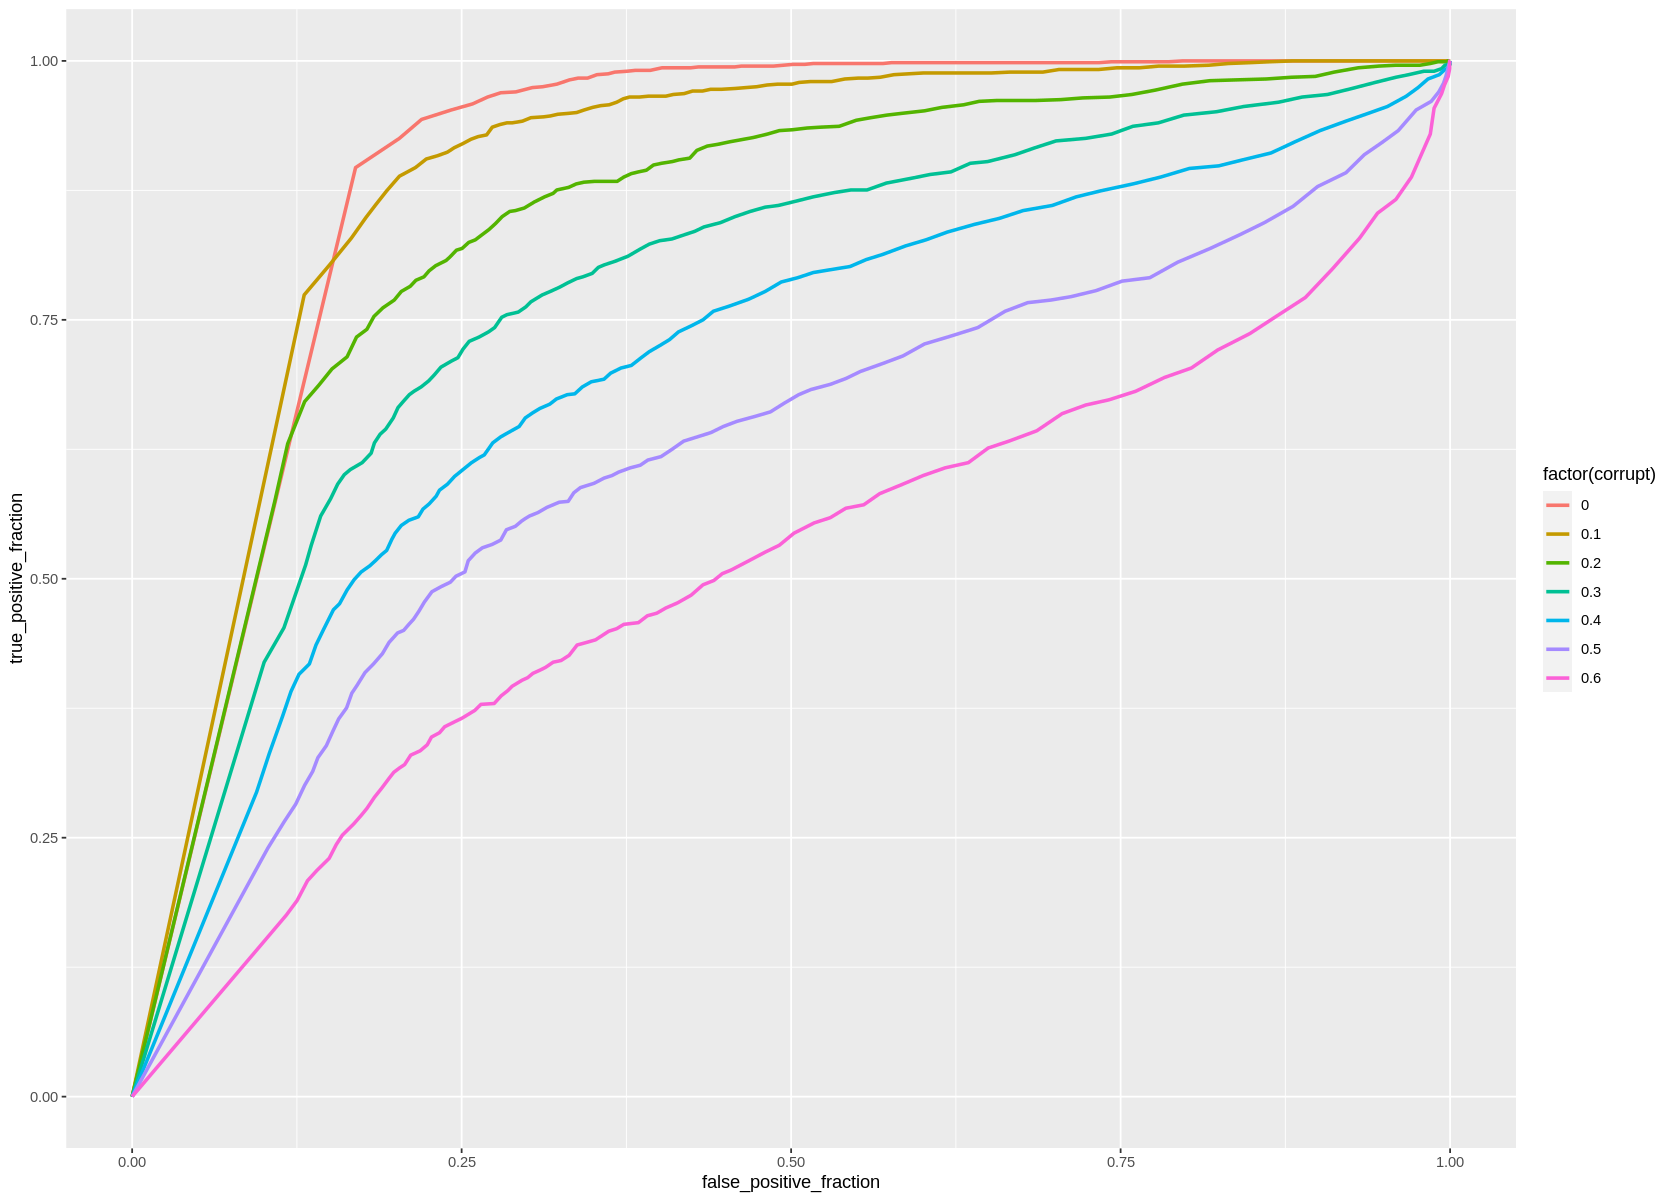

In [12]:
ggplot(tbl, aes(d=True_Gamma,m=Estmated_Gamma,color=factor(corrupt)))+geom_roc(n.cuts = 0)

In [24]:
i=50
scatter.df <- data.frame(tranSig = as.vector(summary.info$z_tranSig[[i]]),
                         music = as.vector(summary.info$z_music[[i]]),
                         empirical = as.vector(summary.info$z_empirical[[i]]),
                         true = as.vector(summary.info$z_true[[i]]),
                         celltype = rep(paste0('celltype',c(1:8)),each = 200))

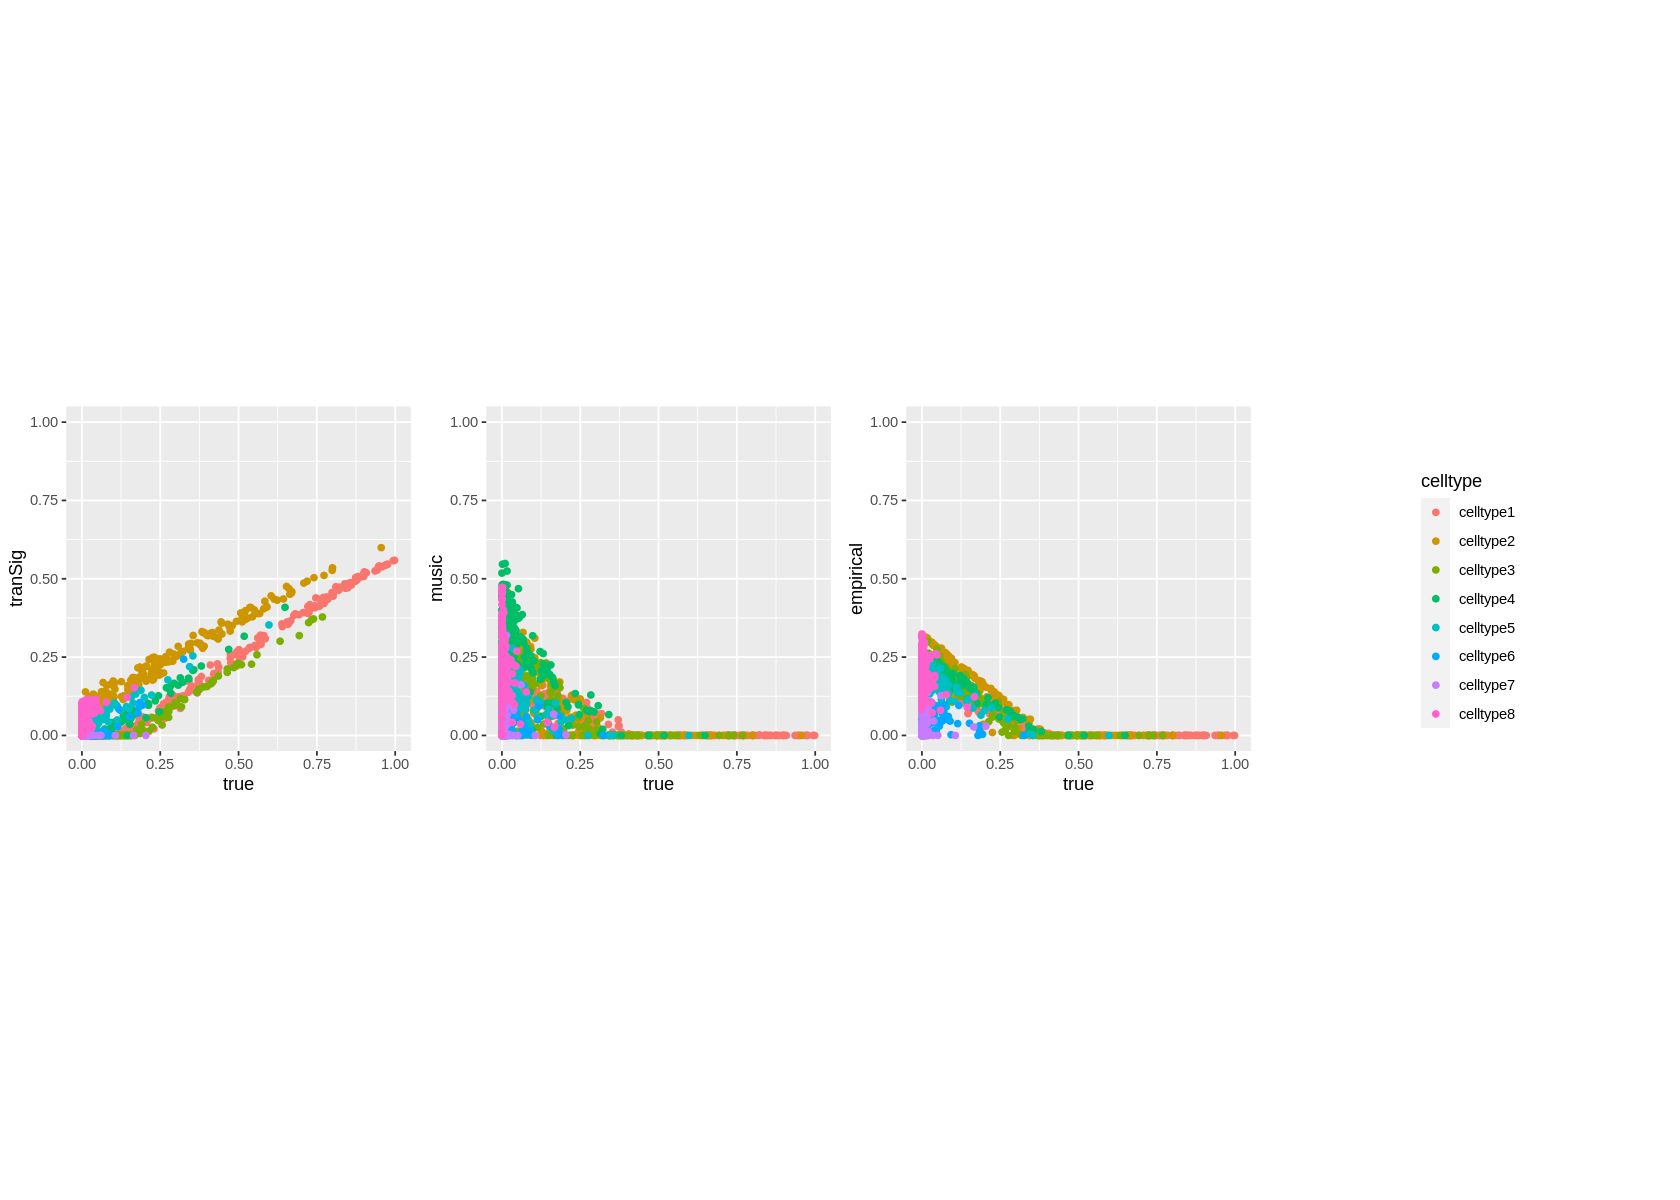

In [33]:
p <- list()
p[[1]]<-ggplot(scatter.df, aes(x=true, y = tranSig, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1) 
p[[2]]<-ggplot(scatter.df, aes(x=true, y = music, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1)+theme(legend.position="none")
p[[3]]<-ggplot(scatter.df, aes(x=true, y = empirical, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,1)+ ylim(0,1)+theme(legend.position="none")
legend <- get_legend(p[[1]])
p[[1]] <- p[[1]] + theme(legend.position="none")


pll <- grid.arrange(p[[1]],p[[2]],p[[3]],legend,ncol=4)

In [65]:
files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "rst.T=*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "rst_frac.*", full.names = TRUE)
files_corrupt0.6 = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/tissue_number',pattern = "*corrupt=0.6.tauW*", full.names = TRUE)
files_rst <- intersect(files_rst, files_corrupt0.6)
files_rst_frac <- intersect(files_rst_frac, files_corrupt0.6)


files_same_input = list.files(path = '/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/tissue_number',pattern = "*", full.names = TRUE)
tissue_number_list <- sapply(files_same_input, basename)
files_same_input = paste0(files_same_input,'/raw_same_input.rds')

names(tissue_number_list) <- NULL
tissue_number_list <- as.numeric(tissue_number_list)
#tissue_number_list <- sort(tissue_number_list)

In [54]:
saveRDS(summary.info,"/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.tissue_number.corrupt=0.6.rds")

In [67]:
n <- length(tissue_number_list) 
dat <- data.frame(cor = c(summary.info$cor.same,summary.info$cor.music,summary.info$cor.empirical),
                 tissue_number_list = rep(tissue_number_list,3),
                 method = c(rep("SAME",n),rep("MuSiC",n),rep("empirical",n)))



In [68]:
str(dat)

'data.frame':	114 obs. of  3 variables:
 $ cor               : num  0.26 0.629 0.596 0.31 -0.181 ...
 $ tissue_number_list: num  10 11 12 13 14 15 16 17 18 19 ...
 $ method            : Factor w/ 3 levels "empirical","MuSiC",..: 3 3 3 3 3 3 3 3 3 3 ...


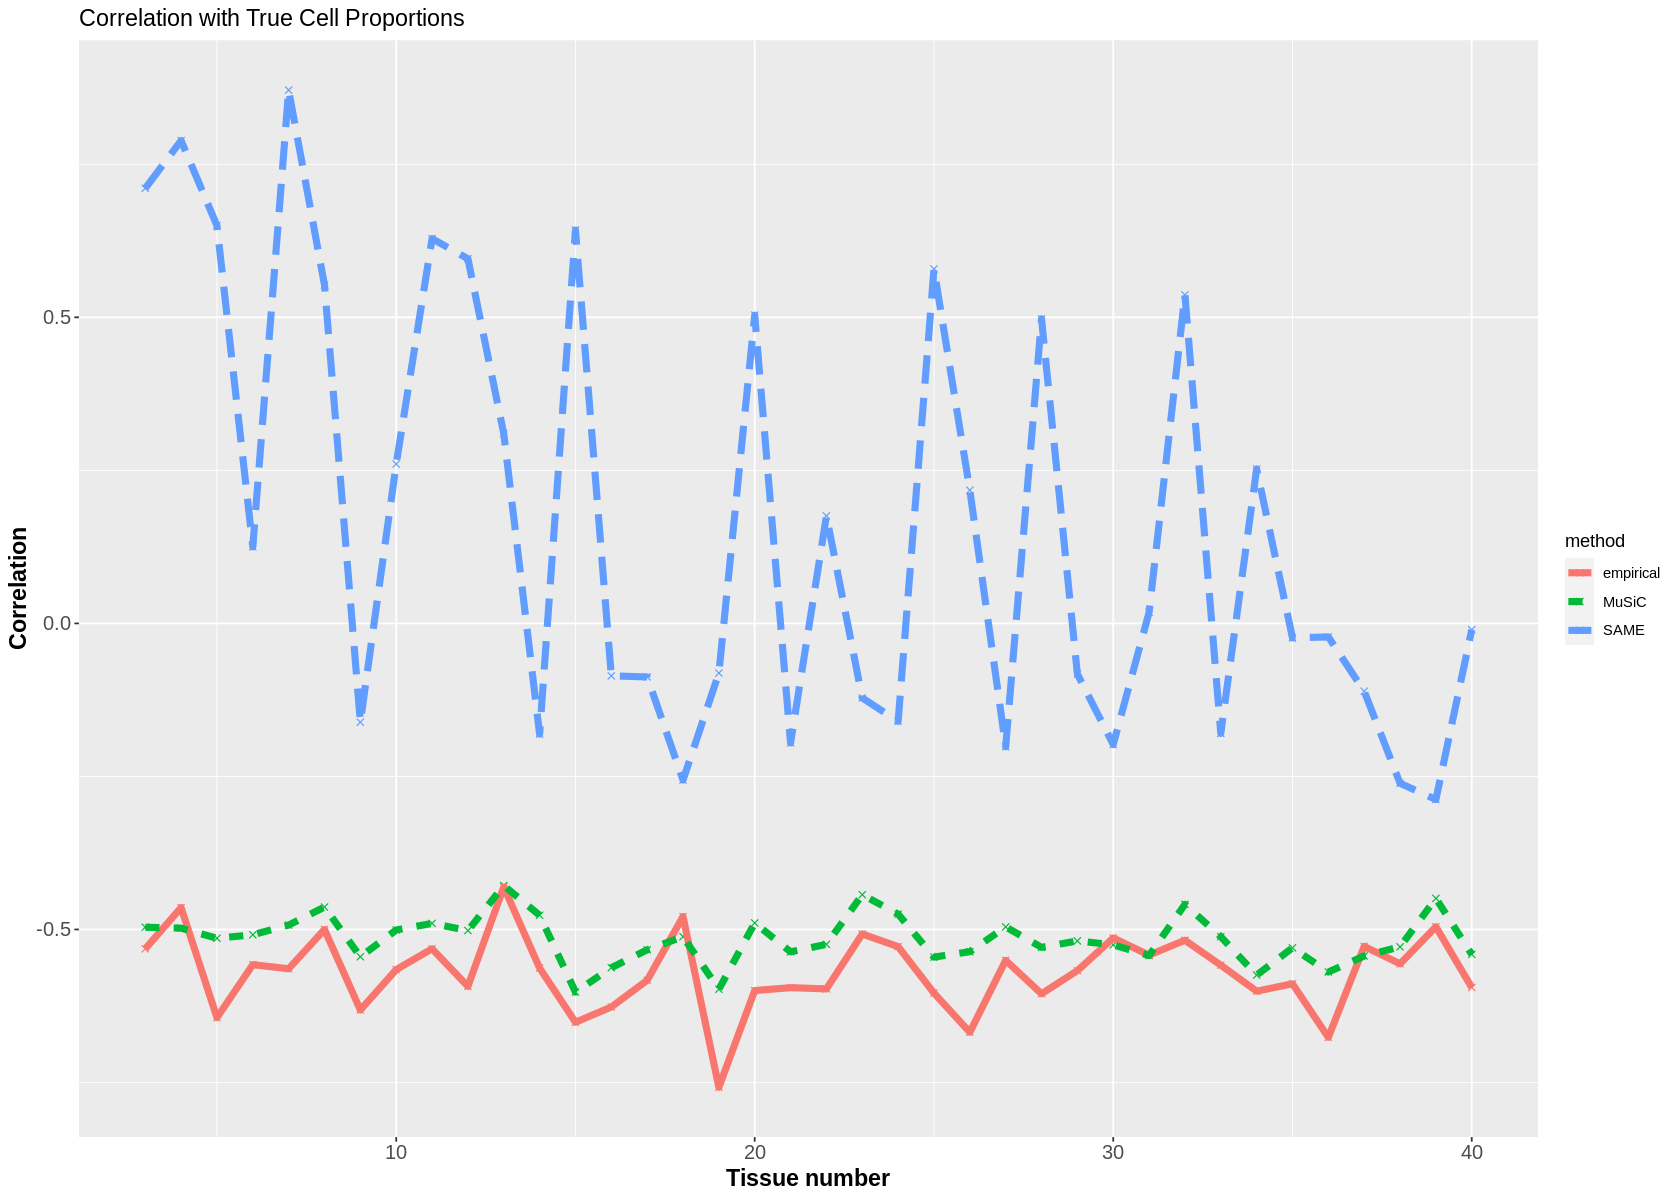

In [70]:
ggplot(dat, aes(tissue_number_list,cor)) + 
geom_point(aes(colour = method), shape = 4) +
labs(y = 'Correlation', x = "Tissue number", title = 'Correlation with True Cell Proportions') + 
geom_line(aes(color = method, linetype = method), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

In [71]:
tbl <- lapply(seq(length(tissue_number_list)),function(idx) 
    data.frame('Estmated_Gamma' = as.vector(summary.info$est_gamma[[idx]]),
               "True_Gamma" = as.vector(summary.info$true_gamma[[idx]]),
               "corrupt" = rep(tissue_number_list,4000)))
tbl <- Reduce(rbind, tbl)

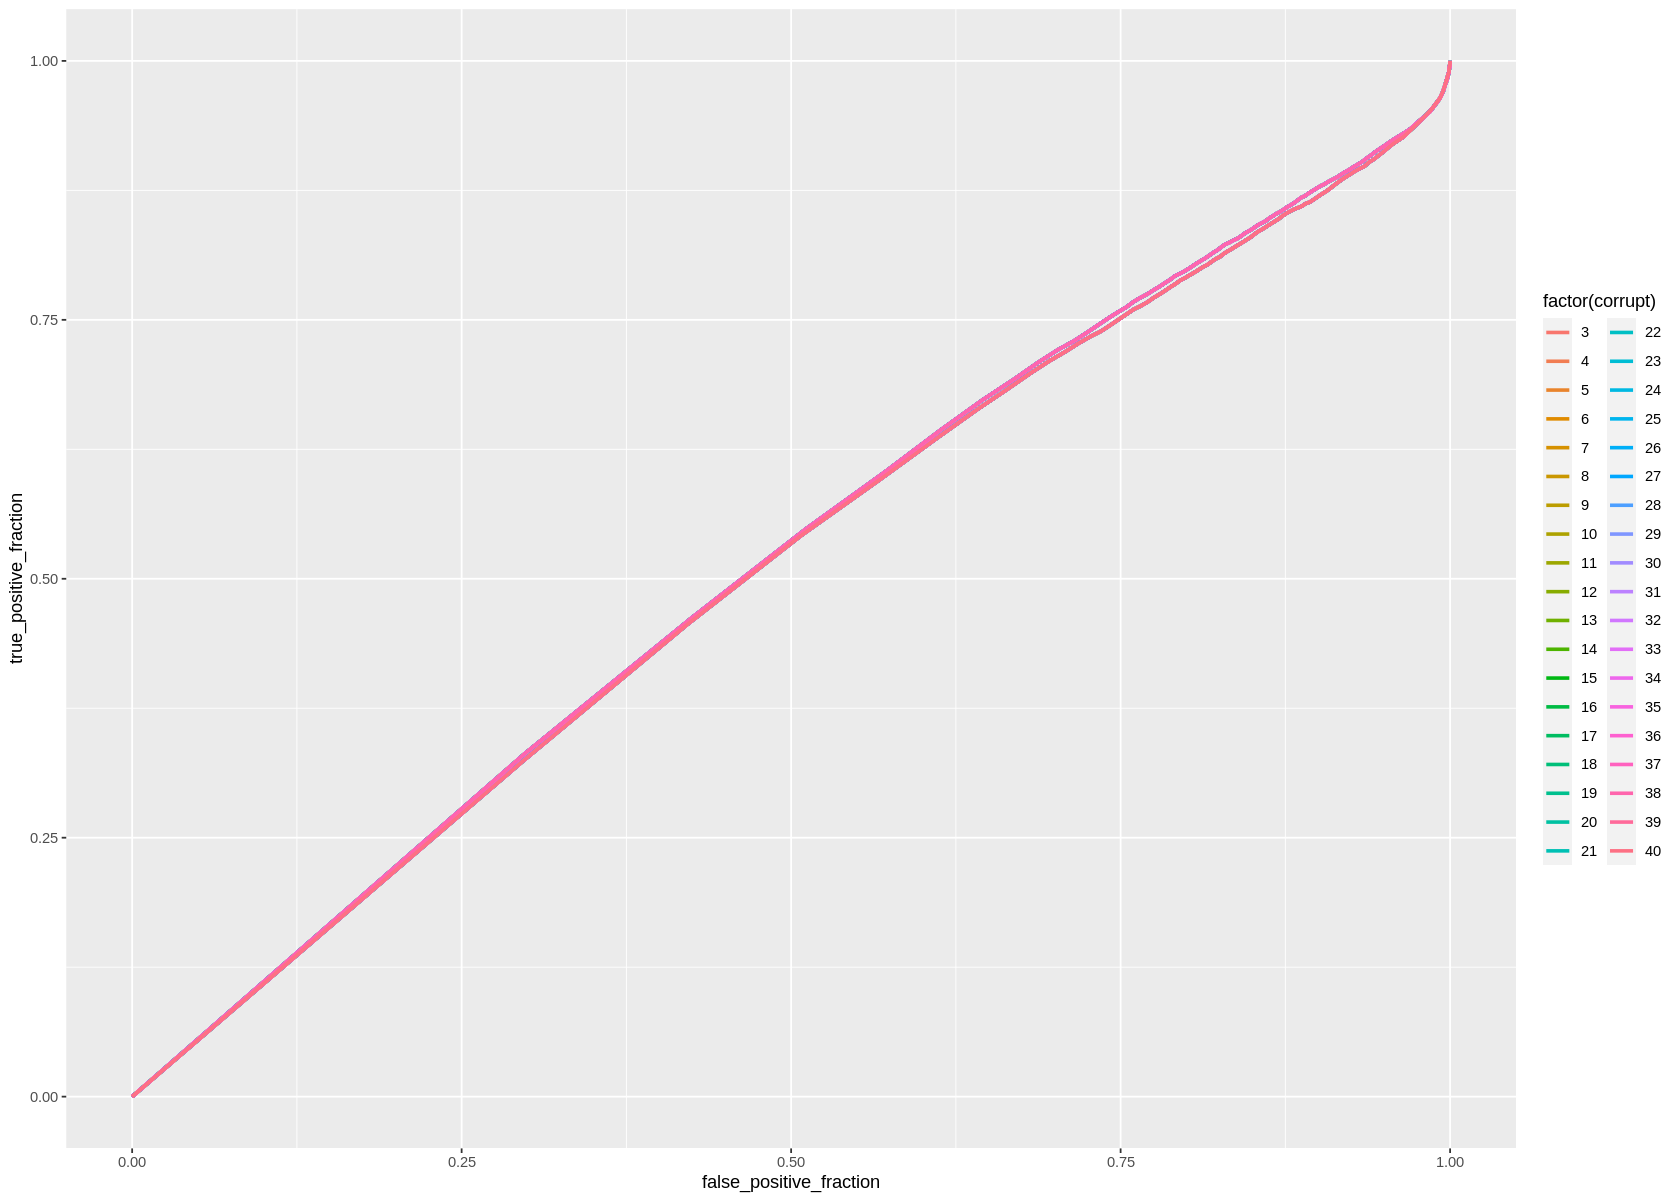

In [72]:
ggplot(tbl, aes(d=True_Gamma,m=Estmated_Gamma,color=factor(corrupt)))+geom_roc(n.cuts = 0)

In [96]:
files_rst = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "rst.T=*", full.names = TRUE)
files_rst_frac = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "rst_frac.*", full.names = TRUE)
#files_corrupt0.6 = list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/gene_number',pattern = "*corrupt=0.6.tauW*", full.names = TRUE)
#files_rst <- intersect(files_rst, files_corrupt0.6)
#files_rst_frac <- intersect(files_rst_frac, files_corrupt0.6)




In [97]:
get_gene_number <- function(file){
    x = strsplit(file, split='=')[[1]][3]
    x = substr(x,1,nchar(x)-2)
    return(as.numeric(x))
}
gene_number_list <- sapply(files_rst,get_gene_number)
names(gene_number_list) <- NULL

In [98]:
#files_same_input = list.files(path = '/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number',pattern = "*", full.names = TRUE)

files_same_input = paste0('/gpfs/loomis/scratch60/zhao/wd262/sc_immune/simulation/gene_number/',gene_number_list,'/raw_same_input.rds')


In [ ]:
summary.info <- get_summary.info(files_rst,files_rst_frac,files_same_input)